<a href="https://colab.research.google.com/github/hrushikeshsahu19/Text-classification-/blob/main/Project_text_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/project/training_data.csv')

In [ ]:
df.head()

,title,category
0,The Three Amigos,None
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products


In [ ]:
df.shape

(20188, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20188 entries, 0 to 20187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20188 non-null  object
 1   category  20188 non-null  object
dtypes: object(2)
memory usage: 315.6+ KB


In [ ]:
df['title']=df['title'].astype('string')
df['category']=df['category'].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20188 entries, 0 to 20187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20188 non-null  string
 1   category  20188 non-null  string
dtypes: string(2)
memory usage: 315.6 KB


In [ ]:
np.unique(df['category'])

array(['Electronics', 'Grocery & Gourmet Food', 'Home & Kitchen',
       'Industrial & Scientific', 'None', 'Office Products',
       'Tools & Home Improvement'], dtype=object)

In [ ]:
df['category'].value_counts()

None                        10123
Home & Kitchen               4960
Tools & Home Improvement     2080
Office Products              1144
Grocery & Gourmet Food       1102
Industrial & Scientific       588
Electronics                   191
Name: category, dtype: Int64

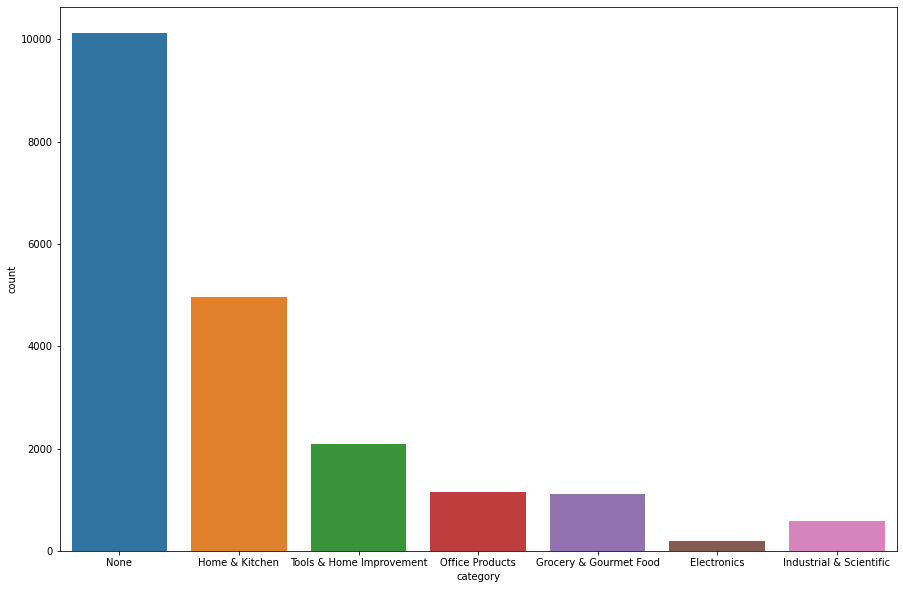

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='category',data=df)

#**take the title which have category**

In [ ]:
df=df[df['category']!='None']

In [ ]:
df.shape

(10065, 2)

In [ ]:
np.unique(df['category'])

array(['Electronics', 'Grocery & Gourmet Food', 'Home & Kitchen',
       'Industrial & Scientific', 'Office Products',
       'Tools & Home Improvement'], dtype=object)

In [ ]:
len(np.unique(df['category']))

6

In [ ]:
df=df.reset_index()

In [ ]:
df['title'][0]

'Home Essentials Blue Floral Glass Vintage Style Water Goblet, Set of 4'

In [ ]:
df['title'][1]

'Cooper Wiring Quiet Toggle Switch Single Pole Lighted 15 A 120 V Ivory Ul Boxed'

In [ ]:
df['title'][3]

'The Great Wave Off Kanagawa Custom Rectangle Mouse Pad Oblong Gaming Mousepad in 220mm*180mm*3mm (9&quot;*7&quot;) -912051'

In [ ]:
df['length']=df['title'].apply(len)
df.head()

,title,category,length
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen,70
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement,79
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement,31
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products,122
5,Nemcor Pittsburgh Penguins NHL #1 Ultimate Fan...,Home & Kitchen,91


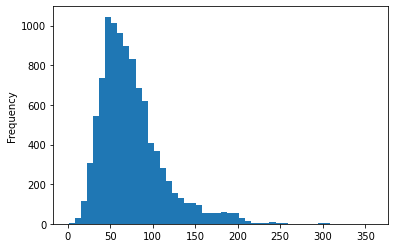

In [ ]:
df['length'].plot(bins=50,kind='hist')

In [ ]:
df.length.describe()

count    10065.000000
mean        75.221759
std         37.548407
min          1.000000
25%         50.000000
50%         68.000000
75%         91.000000
max        359.000000
Name: length, dtype: float64

In [ ]:
#stopwords.words('english')

## Let us write a function which removes punctuation and stopwords from our data

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

#**build a custom function for text processing**

In [ ]:
def text_process(msg):
  msg=msg.lower()
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['tokenized_title'] = df['title'].apply(text_process)

In [ ]:
df.head()

,title,category,length,tokenized_title
1,Home Essentials Blue Floral Glass Vintage Styl...,Home & Kitchen,70,home essentials blue floral glass vintage styl...
2,Cooper Wiring Quiet Toggle Switch Single Pole ...,Tools & Home Improvement,79,cooper wiring quiet toggle switch single pole ...
3,Baseboarders&reg; Wall Brackets,Tools & Home Improvement,31,baseboardersreg wall brackets
4,The Great Wave Off Kanagawa Custom Rectangle M...,Office Products,122,great wave kanagawa custom rectangle mouse pad...
5,Nemcor Pittsburgh Penguins NHL #1 Ultimate Fan...,Home & Kitchen,91,nemcor pittsburgh penguins nhl 1 ultimate fan ...


#**TfidfVectorizer**

In [ ]:
vectorizer =  TfidfVectorizer(analyzer='word', max_features=10000, ngram_range=(1,3), stop_words='english')
X = vectorizer.fit_transform(df['tokenized_title'])

In [ ]:
y

0                  Home & Kitchen
1        Tools & Home Improvement
2        Tools & Home Improvement
3                 Office Products
4                  Home & Kitchen
                   ...           
10060              Home & Kitchen
10061      Grocery & Gourmet Food
10062     Industrial & Scientific
10063              Home & Kitchen
10064    Tools & Home Improvement
Name: category, Length: 10065, dtype: string

In [ ]:
print(vectorizer.get_feature_names())

['01', '05', '05mm', '07', '10', '10 inch', '10 oz', '10 pack', '10 piece', '100', '100 cotton', '100 count', '100 egyptian', '100 egyptian cotton', '100 ft', '100 natural', '100 pure', '1000', '100percent', '100w', '102', '104', '105quot', '108', '10ft', '10inch', '10m', '10mm', '10pack', '10pcs', '10quot', '10w', '11', '11 17', '11 inch', '11 inches', '11 oz', '110', '1100', '110v', '112quot', '114', '114inch', '114quot', '115', '116quot', '11inch', '11ounce', '11oz', '11quot', '11x14', '11x17', '12', '12 12', '12 16', '12 case', '12 count', '12 inch', '12 inches', '12 ounce', '12 oz', '12 pack', '120', '1200', '1200 thread', '1200 thread count', '120v', '125', '125quot', '128', '12count', '12cup', '12inch', '12mm', '12ounce', '12pack', '12pcs', '12quot', '12quot 12quot', '12quot length', '12quot width', '12v', '12volt', '12w', '12x18', '13', '13 19in', '13 inch', '135', '13inch', '13quot', '13w', '14', '14 inch', '14 inches', '14 oz', '141', '144', '145', '145 oz', '14inch', '14ounc

In [ ]:
X.toarray().shape

(10065, 2005)

#**Train Test Split**

In [ ]:
train_X, test_X, y_train, y_test = train_test_split(df['tokenized_title'], df['category'],stratify=df['category'],test_size = 0.2, random_state = 0)

In [ ]:
train_vectorized = vectorizer.transform(train_X)
test_vectorized = vectorizer.transform(test_X)

In [ ]:
X_train= train_vectorized.toarray()
X_test = test_vectorized.toarray()

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8052, 10000) (8052,)
(2013, 10000) (2013,)


#**RandomForestClassifier Model**

In [ ]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_train,y_train)

#**Model evalution**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)

print('Train accuracy = ',train_accuracy)
print('Test accuracy = ',test_accuracy)

print()
train_f1=f1_score(y_train,y_train_pred,average='weighted')
test_f1=f1_score(y_test,y_test_pred,average='weighted')

print('Train F1 Score = ',train_f1)
print('Test F1 Score = ',test_f1)

Train accuracy =  0.9987580725285643
Test accuracy =  0.7759562841530054

Train F1 Score =  0.9987592566350726
Test F1 Score =  0.7651274802267105


#**For Train Data**

In [ ]:
from sklearn.metrics import classification_report
my_df_train = pd.DataFrame(classification_report(model.predict(X_train), 
                                        y_train, digits=2,
                                        output_dict=True)).T

my_df_train['support'] = my_df_train.support.apply(int)

my_df_train.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
Electronics,0.993464,1.000000,0.996721,152
Grocery & Gourmet Food,0.997732,1.000000,0.998865,880
Home & Kitchen,0.998740,1.000000,0.999370,3963
Industrial & Scientific,1.000000,1.000000,1.000000,470
Office Products,0.997814,1.000000,0.998906,913
Tools & Home Improvement,1.000000,0.994026,0.997004,1674
accuracy,0.998758,0.998758,0.998758,0
macro avg,0.997958,0.999004,0.998478,8052
weighted avg,0.998761,0.998758,0.998757,8052


#**For Test Data**

In [ ]:
from sklearn.metrics import classification_report
my_df_test = pd.DataFrame(classification_report(model.predict(X_test), 
                                        y_test, digits=2,
                                        output_dict=True)).T

my_df_test['support'] = my_df_test.support.apply(int)

my_df_test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
Electronics,0.263158,0.588235,0.363636,17
Grocery & Gourmet Food,0.822727,0.766949,0.793860,236
Home & Kitchen,0.890121,0.808608,0.847409,1092
Industrial & Scientific,0.296610,0.760870,0.426829,46
Office Products,0.615721,0.815029,0.701493,173
Tools & Home Improvement,0.750000,0.694878,0.721387,449
accuracy,0.775956,0.775956,0.775956,0
macro avg,0.606389,0.739095,0.642436,2013
weighted avg,0.808526,0.775956,0.786785,2013


#**Model Testing**

In [ ]:
#load the dataset
df_test=pd.read_csv('/content/drive/MyDrive/project/testing_data.csv')

In [ ]:
df_test.shape

(10094, 3)

In [ ]:
def predict_title_category(data):
  #data preprocessing
  data['tokenized_title'] = data['title'].apply(text_process)
  #convert to array
  test_vectorized_array= vectorizer.transform(data['tokenized_title']).toarray()
  #predict the title category
  data['category'] =model.predict(test_vectorized_array)
  #take only requred features
  data=data.drop('tokenized_title',axis=1)
  return data


In [ ]:
data=predict_title_category(df_test)

In [ ]:
data.head()

,title,category
0,Pom Pom Hair Band Rabbit Light Grey Decorative...,Tools & Home Improvement
1,Mariposa Golf Ball Napkin Weight,Home & Kitchen
2,Mediterranean Snack Food Roasted Garlic Hummuz...,Grocery & Gourmet Food
3,John Deere 0071750GX22269 Genuine Original Equ...,Home & Kitchen
4,"Protech Wood Cleanr Gl,PERFORMANCE COATINGS IN...",Home & Kitchen


In [ ]:
data.to_csv('/content/drive/MyDrive/project/test_data_jan_16.csv')